In [ ]:
import os
from collections import Counter, defaultdict
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import json
import csv
import pandas as pd
import seaborn as sns
import numpy as np

# from lexical_change1 import get_time_series

In [ ]:
ROOT = '/mnt/data0/lucy/manosphere/'
WORD_FILE = ROOT + 'data/ann_sig_entities.csv'
LOGS = ROOT + 'logs/'
TIME_SERIES_DIR = LOGS + 'time_series/'
PLOTS = LOGS + 'plots/'

# Time Series

This notebook visualizes time series for different words in our vocabulary of interest. 

The inputs to this notebook are mainly from `lexical_change.py`. 

In [ ]:
words = pd.read_csv(WORD_FILE)

In [4]:
words

,ngram,entity,related_entity,labels,det / poss,total_count,tagged_count,ratio,keep,reason
0,unigram,women,woman,"{""nom_per"": 4732827, ""prop_per"": 2689}","{"""": 4245758, ""all"": 103083, ""the"": 138958, ""a...",6605369,4735516.0,0.716919,Y,NaN
1,unigram,men,man,"{""nom_per"": 2997843, ""prop_per"": 5541}","{"""": 2727020, ""these"": 27717, ""the"": 90381, ""t...",4997436,3003384.0,0.600985,Y,NaN
2,unigram,people,person,"{""nom_per"": 2366727, ""prop_per"": 1109}","{""all"": 15223, """": 2009987, ""some"": 153769, ""t...",4650905,2367836.0,0.509113,Y,NaN
3,unigram,girl,girls,"{""nom_per"": 1434612, ""prop_per"": 3288}","{""a"": 626773, ""the"": 295847, """": 78635, ""this""...",2672802,1437900.0,0.537975,Y,NaN
4,unigram,man,men,"{""nom_per"": 1249340, ""prop_per"": 2377}","{""the"": 152902, ""a"": 589129, ""each"": 2686, ""ev...",2448682,1251717.0,0.511180,Y,NaN
...,...,...,...,...,...,...,...,...,...,...
9097,glossary,observed,NaN,NaN,NaN,18968,NaN,0.002109,N,NaN
9098,glossary,tools,NaN,NaN,NaN,41704,NaN,0.001391,N,NaN
9099,glossary,she,NaN,NaN,NaN,10856459,NaN,0.001328,Y,NaN
9100,glossary,jaw,NaN,NaN,NaN,49317,NaN,0.001196,N,NaN


In [ ]:
def month_year_iter(start, end):
    '''
    https://stackoverflow.com/questions/5734438/how-to-create-a-month-iterator
    
    This function differs slightly from the one in lexical_change.py 
    because it converts the string to a datetime date. 
    '''
    start_contents = start.split('-')
    start_month = int(start_contents[1])
    start_year = int(start_contents[0])
    end_contents = end.split('-')
    end_month = int(end_contents[1])
    end_year = int(end_contents[0])
    ym_start= 12*start_year + start_month - 1
    ym_end= 12*end_year + end_month - 1
    for ym in range( ym_start, ym_end ):
        y, m = divmod( ym, 12 )
        month = str(m + 1)
        if len(month) == 1: 
            month = '0' + month
        str_month_year = str(y) + '-' + month
        yield dt.datetime.strptime(str_month_year,'%Y-%m').date()

def get_time_series_data(dataset, per_doc=True): 
    '''
    Reads in a vocab file and a numpy matrix, where
    each row of the numpy matrix corresponds to the time series for a word.
    The order of rows and words in the vocab file match each other. 
    
    @inputs
    - dataset: str can be either 'manosphere' or 'control'
    '''
    word_list = []
            
    if per_doc: 
        with open(TIME_SERIES_DIR + 'vocab_' + dataset + '_set.txt', 'r') as infile: 
            for line in infile: 
                word_list.append(line.strip())
        matrix = np.load(TIME_SERIES_DIR + 'time_series_' + dataset + '_smoothed_set.npy')
    else:
        with open(TIME_SERIES_DIR + 'vocab_' + dataset + '.txt', 'r') as infile: 
            for line in infile: 
                word_list.append(line.strip())
        matrix = np.load(TIME_SERIES_DIR + 'time_series_' + dataset + '.npy')
    
    time_series_dict = {}
    for i, word in enumerate(word_list): 
        time_series_dict[word] = matrix[i]
    
    min_month = '2005-11'
    max_month = '2019-12'
    months = list(month_year_iter(min_month, max_month))
    
    return time_series_dict, months

In [ ]:
time_series_dict, months = get_time_series_data('manosphere', per_doc=False)
for i, word in enumerate(time_series_dict): 
    sns.lineplot(x = months, y = time_series_dict[word])
    plt.title(word)
    plt.ylabel("probability")
    plt.xlabel("time")
    plt.savefig(PLOTS + word + '_manosphere.png')
    plt.show()
    if i > 10: break

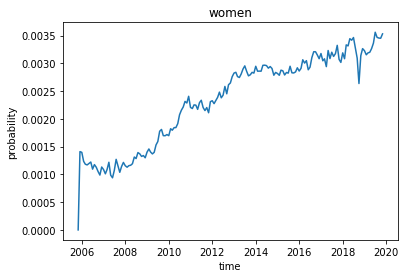

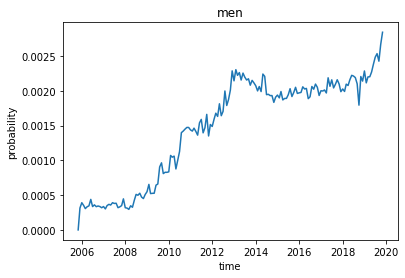

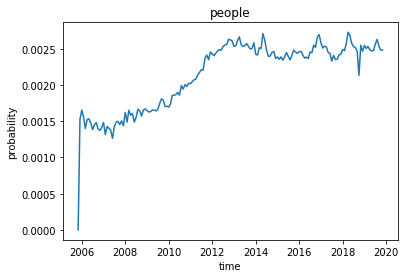

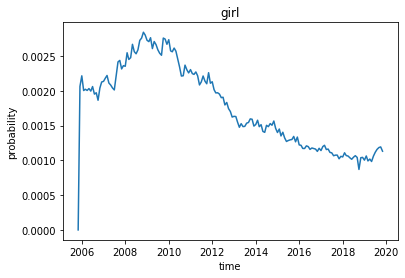

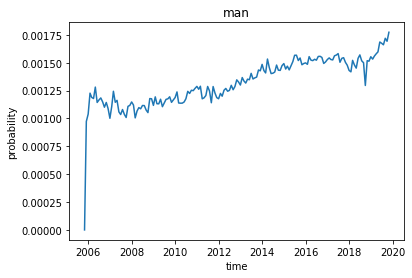

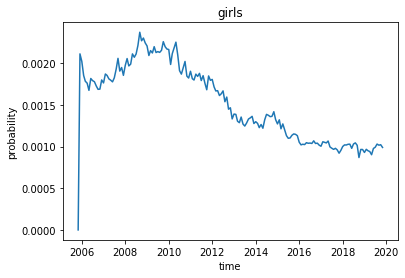

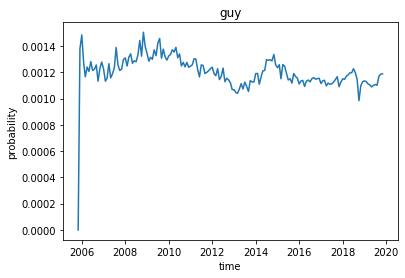

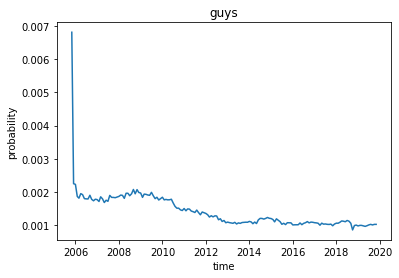

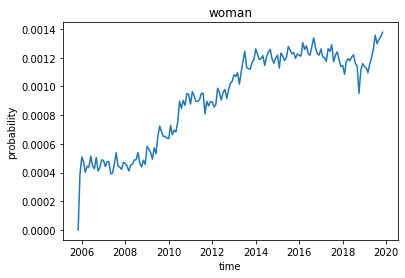

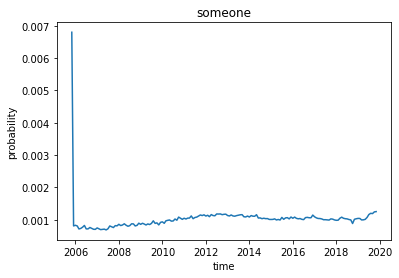

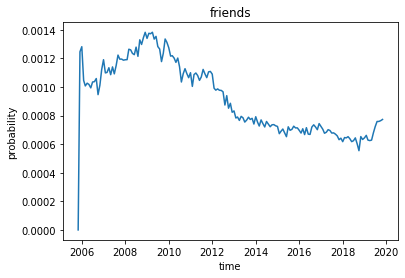

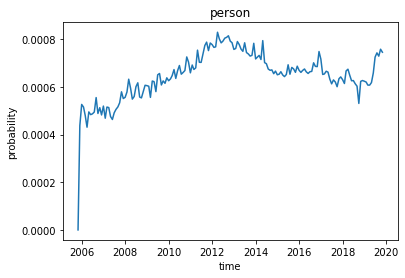

In [10]:
time_series_dict, months = get_time_series_data('manosphere', per_doc=True)
for i, word in enumerate(time_series_dict): 
    sns.lineplot(x = months, y = time_series_dict[word])
    plt.title(word)
    plt.ylabel("probability")
    plt.xlabel("time")
    plt.savefig(PLOTS + word + '_manosphere.png')
    plt.show()
    if i > 10: break

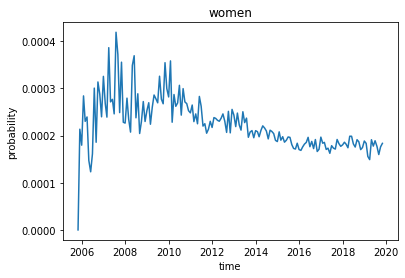

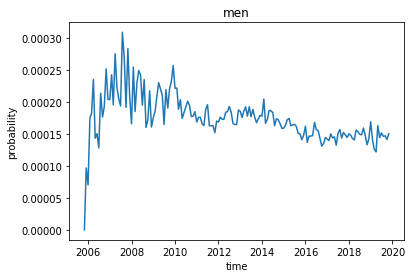

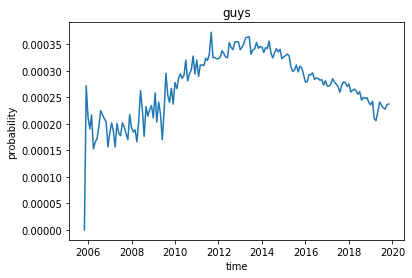

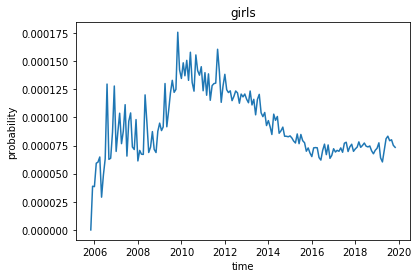

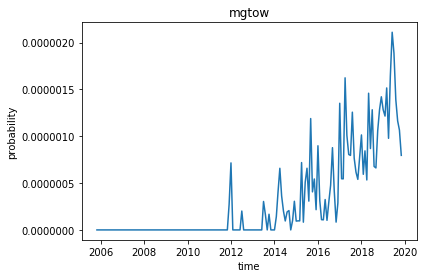

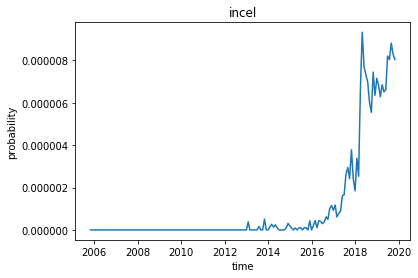

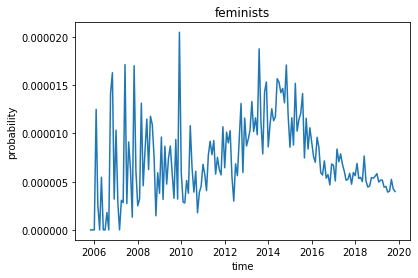

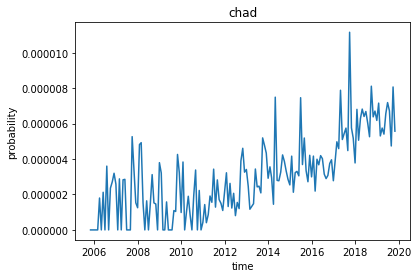

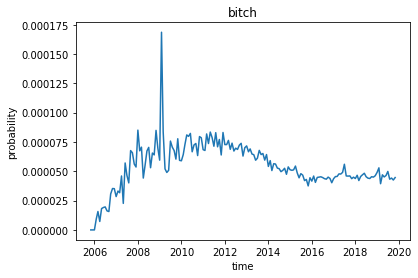

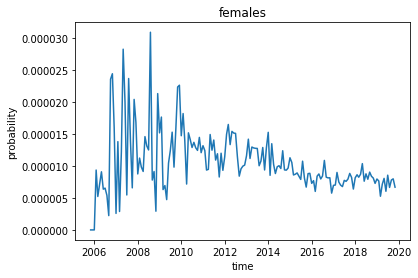

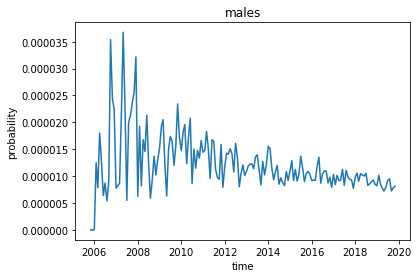

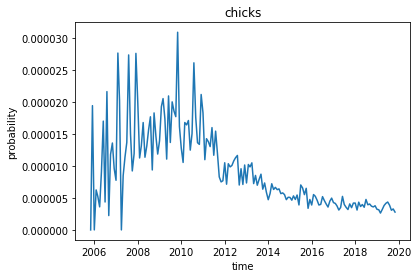

In [11]:
time_series_dict, months = get_time_series_data('control', per_doc=False)
for i, word in enumerate(time_series_dict): 
    sns.lineplot(x = months, y = time_series_dict[word])
    plt.title(word)
    plt.ylabel("probability")
    plt.xlabel("time")
    plt.savefig(PLOTS + word + '_manosphere.png')
    plt.show()
    if i > 10: break

In [13]:
time_series_dict, months = get_time_series_data('control', per_doc=True)
for i, word in enumerate(time_series_dict): 
    sns.lineplot(x = months, y = time_series_dict[word])
    plt.title(word)
    plt.ylabel("probability")
    plt.xlabel("time")
    plt.savefig(PLOTS + word + '_control.png')
    plt.show()
    if i > 10: break

IndexError: index 200 is out of bounds for axis 0 with size 200

## Investigate time series patterns

In [14]:
# load membership, time series, vocab
word_list = []
with open(TIME_SERIES_DIR + 'vocab_manosphere_set.txt', 'r') as infile: 
        for line in infile: 
            word_list.append(line.strip())
matrix = np.load(TIME_SERIES_DIR + 'time_series_manosphere_set.npy')
mem = np.load(TIME_SERIES_DIR + 'clusters_set.npy')

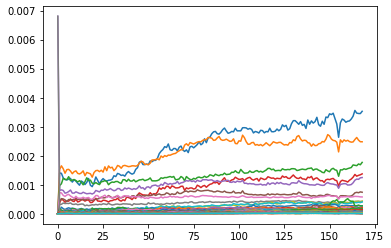

['women', 'people', 'man', 'woman', 'someone', 'person', 'everyone', 'others', 'kids', 'family', 'bitch', 'parents', 'bro', 'kid', 'boys', 'females', 'boy', 'nobody', 'mom', 'dad', 'baby', 'virgin', 'brother', 'dudes', 'son', 'asshole', 'slut', 'bitches', 'idiot', 'somebody', 'team', 'students', 'loser', 'doctor', 'lady', 'teacher', 'boss', 'mods', 'user', 'brothers', 'users', 'king', 'folks', 'couples', 'daddy', 'losers', 'enemy', 'players', 'creep', 'sir', 'therapist', 'asians', 'audience', 'mod', 'hero', 'teen', 'moms', 'captain', 'teens', 'nerd', 'manager', 'driver', 'cop', 'staff', 'princess', 'moron', 'prostitute', 'lord', 'queen', 'owner']


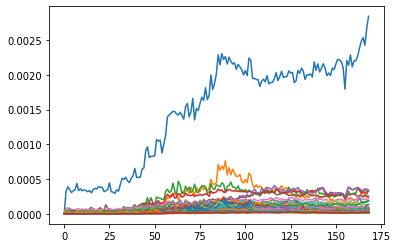

['men', 'feminists', 'child', 'children', 'wife', 'op', 'mother', 'father', 'males', 'husband', 'police', 'victim', 'partner', 'victims', 'population', 'individual', 'humans', 'troll', 'daughter', 'adult', 'mra', 'partners', 'mothers', 'parent', 'lawyer', 'fathers', 'sluts', 'wives', 'mrm', 'babies', 'mras', 'minority', 'cops', 'families', 'individuals', 'rapist', 'betas', 'idiots', 'teachers', 'rapists', 'americans', 'author', 'blacks', 'assholes', 'adults', 'president', 'husbands', 'provider', 'doctors', 'alphas', 'trolls', 'slaves', 'misogynist', 'sons', 'politicians', 'leaders', 'daughters', 'prostitutes', 'professor', 'peers', 'lawyers', 'employees', 'officer', 'household']


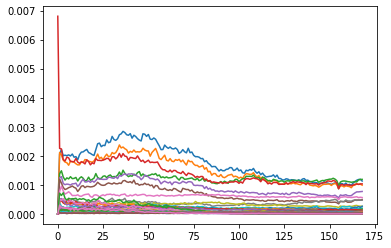

['girl', 'girls', 'guy', 'guys', 'friends', 'friend', 'anyone', 'dude', 'group', 'girlfriend', 'ex', 'chick', 'boyfriend', 'community', 'chicks', 'mate', 'target', 'sister', 'buddy', 'everybody', 'anybody', 'ladies', 'afc', 'player', 'girlfriends', 'master', 'hb8', 'strangers', 'leader', 'crowd', 'jerk', 'stranger', 'fool', 'band', 'hb9', 'hb7', 'boyfriends', 'buddies', 'artist', 'mates', 'cousin', 'expert', 'puas', 'roommate', 'peoples', 'sisters', 'amog']


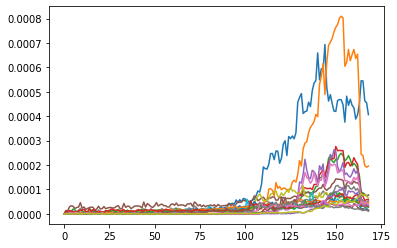

['mgtow', 'chad', 'cuck', 'chads', 'normies', 'whore', 'normie', 'whores', 'sjw', 'jews', 'whites', 'slave', 'virgins', 'retard', 'stacy', 'muslims', 'monk', 'sjws', 'simp']


In [15]:
# get cluster num to set of words
clusters = defaultdict(list)
for i in range(len(mem)): 
    clusters[mem[i]].append(i)
# for each cluster, print words and plot their plots
for clust in clusters: 
    clust_words = []
    for idx in clusters[clust]: 
        clust_words.append(word_list[idx])
        plt.plot(matrix[idx])
    plt.show()
    print(clust_words)